# Rehnquist Court Analysis (symmetrized data, 2/1/2019)

## Correlation matrix

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
sup_court_data = pd.read_csv("SCDB_2018_02_justiceCentered_Citation.csv",encoding = "ISO-8859-1")

is_rehnquist = ((sup_court_data['term'].astype(int) > 1994) & (sup_court_data['term'].astype(int) < 2005))
rehnquist_data = sup_court_data[is_rehnquist]

In [11]:
justices = ['JPStevens',
            'RBGinsburg',
            'DHSouter',
            'SGBreyer',
            'SDOConnor',
            'AMKennedy',
            'WHRehnquist',
            'AScalia',
            'CThomas']

In [12]:
to_ising = lambda x: 2 * (x - 1.0) - 1.0
voting_data = rehnquist_data.pivot(columns="justiceName", index="caseId", values="direction")
voting_data = voting_data[justices]
voting_data = voting_data.transform(to_ising)
voting_data = voting_data.dropna(0)

In [19]:
corr

justiceName,JPStevens,RBGinsburg,DHSouter,SGBreyer,SDOConnor,AMKennedy,WHRehnquist,AScalia,CThomas
justiceName,,,,,,,,,
JPStevens,1.000000,0.663814,0.650055,0.627199,0.412972,0.405069,0.306375,0.247094,0.287003
RBGinsburg,0.663814,1.000000,0.805355,0.747012,0.534947,0.505388,0.464967,0.372178,0.373414
DHSouter,0.650055,0.805355,1.000000,0.731575,0.583143,0.548506,0.481781,0.421713,0.429120
SGBreyer,0.627199,0.747012,0.731575,1.000000,0.606872,0.526068,0.481226,0.354307,0.340426
SDOConnor,0.412972,0.534947,0.583143,0.606872,1.000000,0.693842,0.704771,0.577161,0.580050
AMKennedy,0.405069,0.505388,0.548506,0.526068,0.693842,1.000000,0.747677,0.619886,0.628657
WHRehnquist,0.306375,0.464967,0.481781,0.481226,0.704771,0.747677,1.000000,0.687390,0.696013
AScalia,0.247094,0.372178,0.421713,0.354307,0.577161,0.619886,0.687390,1.000000,0.835494
CThomas,0.287003,0.373414,0.429120,0.340426,0.580050,0.628657,0.696013,0.835494,1.000000


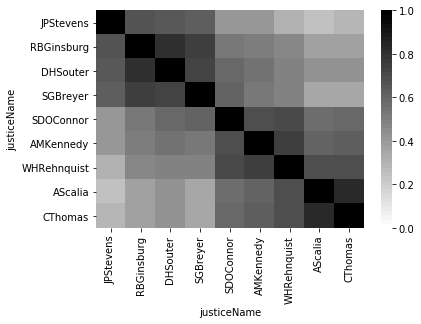

In [22]:
corr = voting_data.corr()
gs = sns.cubehelix_palette(50, hue=0.01, rot=0, light=1.0, dark=0.0)
sns.heatmap(corr, cmap=gs, xticklabels=corr.columns, yticklabels=corr.columns,  vmin=0.0, vmax=1.0)
np.savetxt("scotus_correlation.csv", corr, delimiter=',')

In [20]:
a=np.loadtxt("scotus_correlation.csv")

## Extracting $J_{ij}$

In [14]:
import itertools
import matlab.engine
import scipy
from copy import deepcopy

In [15]:
def plot_heatmap(J):
    J_ = deepcopy(J)
    if J_.shape != (9,9): J_ = J_.reshape((9,9))
    cm = sns.diverging_palette(248, 12, sep=1, n=256)
    sns.heatmap(J_, cmap=cm, xticklabels=justices, yticklabels=justices,  vmin=-1, vmax=1)

In [23]:
all_scotus_states = np.array(list(itertools.product([-1,1], repeat=9)))
np.savetxt("all_scotus_states.csv", all_scotus_states, delimiter=",")

In [27]:
eng = matlab.engine.start_matlab()
eng.find_j_matrix(nargout=0)
eng.quit()

In [28]:
J_matrix = pd.read_csv("jij_sols.csv",encoding = "ISO-8859-1", header=None)

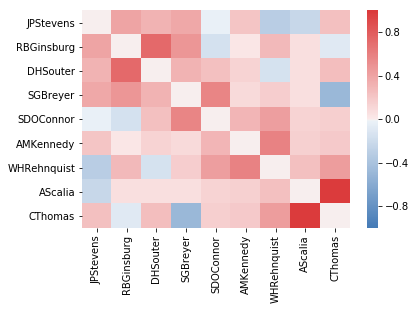

In [29]:
plot_heatmap(J_matrix)